SMITA GUPTA<br>
USC ID: 4123927261

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import pprint
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
from glob import glob
import os
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import seaborn as sns
import warnings
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc 
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import enum
from sklearn.utils import resample
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline

C) i) Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).<BR>
SOL.) Time-domain Series features:
    Mean, Median, Standard Deviation, Maximum, Minimum, first Quartile, third quartile, Variance, Skewness, kurtosis, Mean Absolute Deviation, AR Coefficients, Waveform length, zero crossing, Willison Amplitude,Slope Sign Change.<br>

C) ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [3]:
#Preparing the structure for the final dataframe to hold the time domain features for each time-series
data = pd.DataFrame(columns = ['activity', 'min1', 'max1', 'mean1', 'median1', 'std1','quara1', 'quarc1',
              'min2', 'max2', 'mean2', 'median2', 'std2','quara2', 'quarc2',
             'min3', 'max3', 'mean3', 'median3', 'std3','quara3', 'quarc3',
             'min4', 'max4', 'mean4', 'median4', 'std4','quara4', 'quarc4',
             'min5', 'max5', 'mean5', 'median5', 'std5','quara5', 'quarc5',
             'min6', 'max6', 'mean6', 'median6', 'std6','quara6', 'quarc6','status'])

data

,activity,min1,max1,mean1,median1,std1,quara1,quarc1,min2,max2,...,quara5,quarc5,min6,max6,mean6,median6,std6,quara6,quarc6,status


In [4]:
#Preparing the structure for the final dataframe to hold the timestamps and time-series data
data_whole_tr = pd.DataFrame(columns = ['time', 'avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
data_whole_tr

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23


In [5]:
#Setting testing and training datasets path
test_path = 'Test/'
train_path = 'Train/'

In [6]:
#Calculating time-domain features for the test data
for file in os.listdir(test_path):
    if '.csv' in file:
        df = pd.read_csv(test_path+file,error_bad_lines=False,skiprows = 4)
        df.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
        row = []
        
        act1 = file[9: -4]
        row.append(act1)
        
        for col in df[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]:
            row.append(df[col].min())
            row.append(df[col].max())
            row.append(df[col].mean())
            row.append(df[col].median())
            row.append(df[col].std())
            row.append(np.quantile(df[col],0.25))
            row.append(np.quantile(df[col],0.75))
        
        row.append('Test')
        row_df = pd.DataFrame([row],columns = data.columns)
        data = pd.concat([data,row_df],ignore_index = True)
        
data

,activity,min1,max1,mean1,median1,std1,quara1,quarc1,min2,max2,...,quara5,quarc5,min6,max6,mean6,median6,std6,quara6,quarc6,status
0,lying,23.50,30.00,27.716375,27.500,1.442253,27.0000,29.0000,0.0,1.79,...,5.5000,10.7500,0.0,4.50,0.734271,0.710,0.613688,0.4300,1.000,Test
1,walking,15.00,46.75,34.660583,35.000,5.315110,31.0000,38.2500,0.0,13.44,...,14.2500,18.5000,0.0,8.99,3.244396,3.000,1.630983,2.1200,4.240,Test
2,sitting,44.50,46.75,45.239667,45.000,0.429915,45.0000,45.3300,0.0,1.00,...,17.6275,21.0000,0.0,8.20,0.837250,0.710,0.835344,0.4300,1.120,Test
3,cycling,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,...,16.0000,21.0000,0.0,8.55,2.983750,2.570,1.815730,1.5000,4.150,Test
4,bending1,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,...,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300,Test
5,bending2,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,...,20.5000,27.0000,0.0,4.97,0.700188,0.500,0.693720,0.4300,0.870,Test
6,standing,33.33,48.00,44.334729,45.000,2.476940,42.2500,46.5000,0.0,3.90,...,9.3300,17.7500,0.0,5.02,0.933000,0.830,0.673609,0.4700,1.250,Test
7,sitting,37.00,50.75,45.917667,45.635,1.089027,45.0000,46.5000,0.0,4.87,...,16.5000,21.0000,0.0,7.22,0.904604,0.710,0.896171,0.4300,1.120,Test
8,cycling,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,...,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900,Test
9,bending1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,...,32.0000,34.5000,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.300,Test


In [7]:
#Calculating and time-domain features for the training data
for file in os.listdir(train_path):
    if '.csv' in file:
        df = pd.read_csv(train_path+file,error_bad_lines=False,skiprows = 4)
        df.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
        row = []
        
        act2 = file[10: -4]
        row.append(act2)

        for col in df[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]:
            row.append(df[col].min())
            row.append(df[col].max())
            row.append(df[col].mean())
            row.append(df[col].median())
            row.append(df[col].std())
            row.append(np.quantile(df[col],0.25))
            row.append(np.quantile(df[col],0.75))

        row.append('Train')
        row_df = pd.DataFrame([row],columns = data.columns)
        data = pd.concat([data,row_df],ignore_index = True)
        
data

,activity,min1,max1,mean1,median1,std1,quara1,quarc1,min2,max2,...,quara5,quarc5,min6,max6,mean6,median6,std6,quara6,quarc6,status
0,lying,23.50,30.00,27.716375,27.50,1.442253,27.00,29.0000,0.0,1.79,...,5.5000,10.7500,0.0,4.50,0.734271,0.71,0.613688,0.4300,1.0000,Test
1,walking,15.00,46.75,34.660583,35.00,5.315110,31.00,38.2500,0.0,13.44,...,14.2500,18.5000,0.0,8.99,3.244396,3.00,1.630983,2.1200,4.2400,Test
2,sitting,44.50,46.75,45.239667,45.00,0.429915,45.00,45.3300,0.0,1.00,...,17.6275,21.0000,0.0,8.20,0.837250,0.71,0.835344,0.4300,1.1200,Test
3,cycling,22.00,44.67,37.058708,36.00,3.710180,34.50,40.0625,0.0,14.17,...,16.0000,21.0000,0.0,8.55,2.983750,2.57,1.815730,1.5000,4.1500,Test
4,bending1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,...,33.0000,36.0000,0.0,1.92,0.570583,0.43,0.582915,0.0000,1.3000,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,bending2,25.00,47.50,31.058250,29.71,4.829794,27.50,31.8125,0.0,6.38,...,9.0000,18.3125,0.0,4.92,1.098104,0.94,0.831480,0.5000,1.3000,Train
84,walking,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,...,14.0000,17.7500,0.0,10.00,3.338125,3.08,1.656742,2.1600,4.3350,Train
85,lying,39.00,56.25,47.325125,42.67,5.961280,42.00,54.0000,0.0,8.49,...,11.7500,18.0000,0.0,5.72,0.766167,0.50,0.723953,0.4300,1.0000,Train
86,sitting,27.00,38.67,32.905979,30.25,3.505776,30.00,37.0000,0.0,2.49,...,16.5000,20.7500,0.0,5.12,0.791354,0.71,0.755739,0.4300,1.0000,Train


C) iii) Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [8]:
#Calculating standard deviation for all the time-domain features
std = [data.std(axis = 0, skipna = True)]  
std

[min1       9.569975
 max1       4.394362
 mean1      5.335718
 median1    5.440054
 std1       1.772166
 quara1     6.153590
 quarc1     5.138925
 min2       0.000000
 max2       5.062729
 mean2      1.574164
 median2    1.412244
 std2       0.884108
 quara2     0.946386
 quarc2     2.125266
 min3       2.956462
 max3       4.875137
 mean3      4.008380
 median3    4.036396
 std3       0.946695
 quara3     4.220658
 quarc3     4.171628
 min4       0.000000
 max4       2.183625
 mean4      1.166114
 median4    1.145586
 std4       0.458248
 quara4     0.843620
 quarc4     1.552504
 min5       6.124001
 max5       5.741238
 mean5      5.675593
 median5    5.813782
 std5       1.024870
 quara5     6.096465
 quarc5     5.531720
 min6       0.045838
 max6       2.518921
 mean6      1.154812
 median6    1.086474
 std6       0.517623
 quara6     0.758584
 quarc6     1.523599
 dtype: float64]

In [9]:
#Calculating 90% bootsrap confidence interval for the standard deviation of each feature.
std_df = pd.DataFrame(std)

confidence_interval = {}
for column in std_df:
    itemCIRange = []
    for i in range(0, 999):
        # Return a random sample of items from an axis of object.
        ran_sample = std_df[column].sample(n=10, replace=True)
        stat = ran_sample.std()
        itemCIRange.append(stat)
    itemCIRange.sort()
    lowerValue = np.percentile(itemCIRange, 0.05)
    upperValue = np.percentile(itemCIRange, 0.95)
    confidence_interval[column] = [lowerValue, upperValue]

pp = pprint.PrettyPrinter(depth=2)
pp.pprint(confidence_interval)

{'max1': [0.0, 0.0],
 'max2': [9.362222582871203e-16, 9.362222582871203e-16],
 'max3': [0.0, 0.0],
 'max4': [4.681111291435602e-16, 4.681111291435602e-16],
 'max5': [9.362222582871203e-16, 9.362222582871203e-16],
 'max6': [4.681111291435602e-16, 4.681111291435602e-16],
 'mean1': [0.0, 0.0],
 'mean2': [2.340555645717801e-16, 2.340555645717801e-16],
 'mean3': [0.0, 0.0],
 'mean4': [0.0, 0.0],
 'mean5': [9.362222582871203e-16, 9.362222582871203e-16],
 'mean6': [0.0, 0.0],
 'median1': [0.0, 0.0],
 'median2': [2.340555645717801e-16, 2.340555645717801e-16],
 'median3': [9.362222582871203e-16, 9.362222582871203e-16],
 'median4': [0.0, 0.0],
 'median5': [9.362222582871203e-16, 9.362222582871203e-16],
 'median6': [2.340555645717801e-16, 2.340555645717801e-16],
 'min1': [0.0, 0.0],
 'min2': [0.0, 0.0],
 'min3': [4.681111291435602e-16, 4.681111291435602e-16],
 'min4': [0.0, 0.0],
 'min5': [0.0, 0.0],
 'min6': [7.314236392868128e-18, 7.314236392868128e-18],
 'quara1': [0.0, 0.0],
 'quara2': [1.170

C) iv) Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).<br>
Sol.) I choose mean, median and standar deviation as the three most important time-domain features.

(d) Binary Classification Using Logistic Regression3 <br>
i) Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. 

In [10]:
#Creating a dataframe having time-domain features(mean, median and standar deviation) as their columns from 1,2 and 6 time series
warnings.filterwarnings('ignore')
data_temp = data[['activity', 'mean1', 'median1', 'std1', 'mean2', 'median2', 'std2', 'mean6','median6', 'std6', 'status']]
data_temp.drop(data_temp.loc[data_temp['status']== 'Test'].index, inplace=True)
data_plot = data_temp.drop(['status'], axis=1)
data_plot = data_plot.replace(to_replace = ["bending1", "bending2"], value = 1) 
data_plot = data_plot.replace(to_replace = ["lying", "walking", "sitting", "cycling", "standing"], value = 0) 
data_plot

,activity,mean1,median1,std1,mean2,median2,std2,mean6,median6,std6
19,0,34.873229,35.25,4.531720,4.380583,3.925,2.435437,3.424646,3.27,1.690960
20,0,42.419917,42.67,2.520129,0.460563,0.470,0.387405,1.226271,1.09,0.891988
21,1,42.179813,43.50,3.670666,0.696042,0.500,0.630860,0.613521,0.50,0.524317
22,1,43.954500,44.33,1.558835,0.426250,0.470,0.338690,0.493292,0.43,0.513506
23,0,39.347104,39.33,0.231405,0.366396,0.470,0.195815,0.588458,0.50,0.423435
...,...,...,...,...,...,...,...,...,...,...
83,1,31.058250,29.71,4.829794,0.405458,0.430,0.566668,1.098104,0.94,0.831480
84,0,34.546229,35.25,4.842294,4.371958,4.135,2.360448,3.338125,3.08,1.656742
85,0,47.325125,42.67,5.961280,0.274313,0.000,0.562729,0.766167,0.50,0.723953
86,0,32.905979,30.25,3.505776,0.456750,0.000,0.538783,0.791354,0.71,0.755739


scatter plots of the features(mean, median and standar deviation) extracted from time series 1, 2, and 6 of each 
instance, and using color to distinguish bending vs. other activities. For bending activities, value = 1 and for 
other activities, value = 0

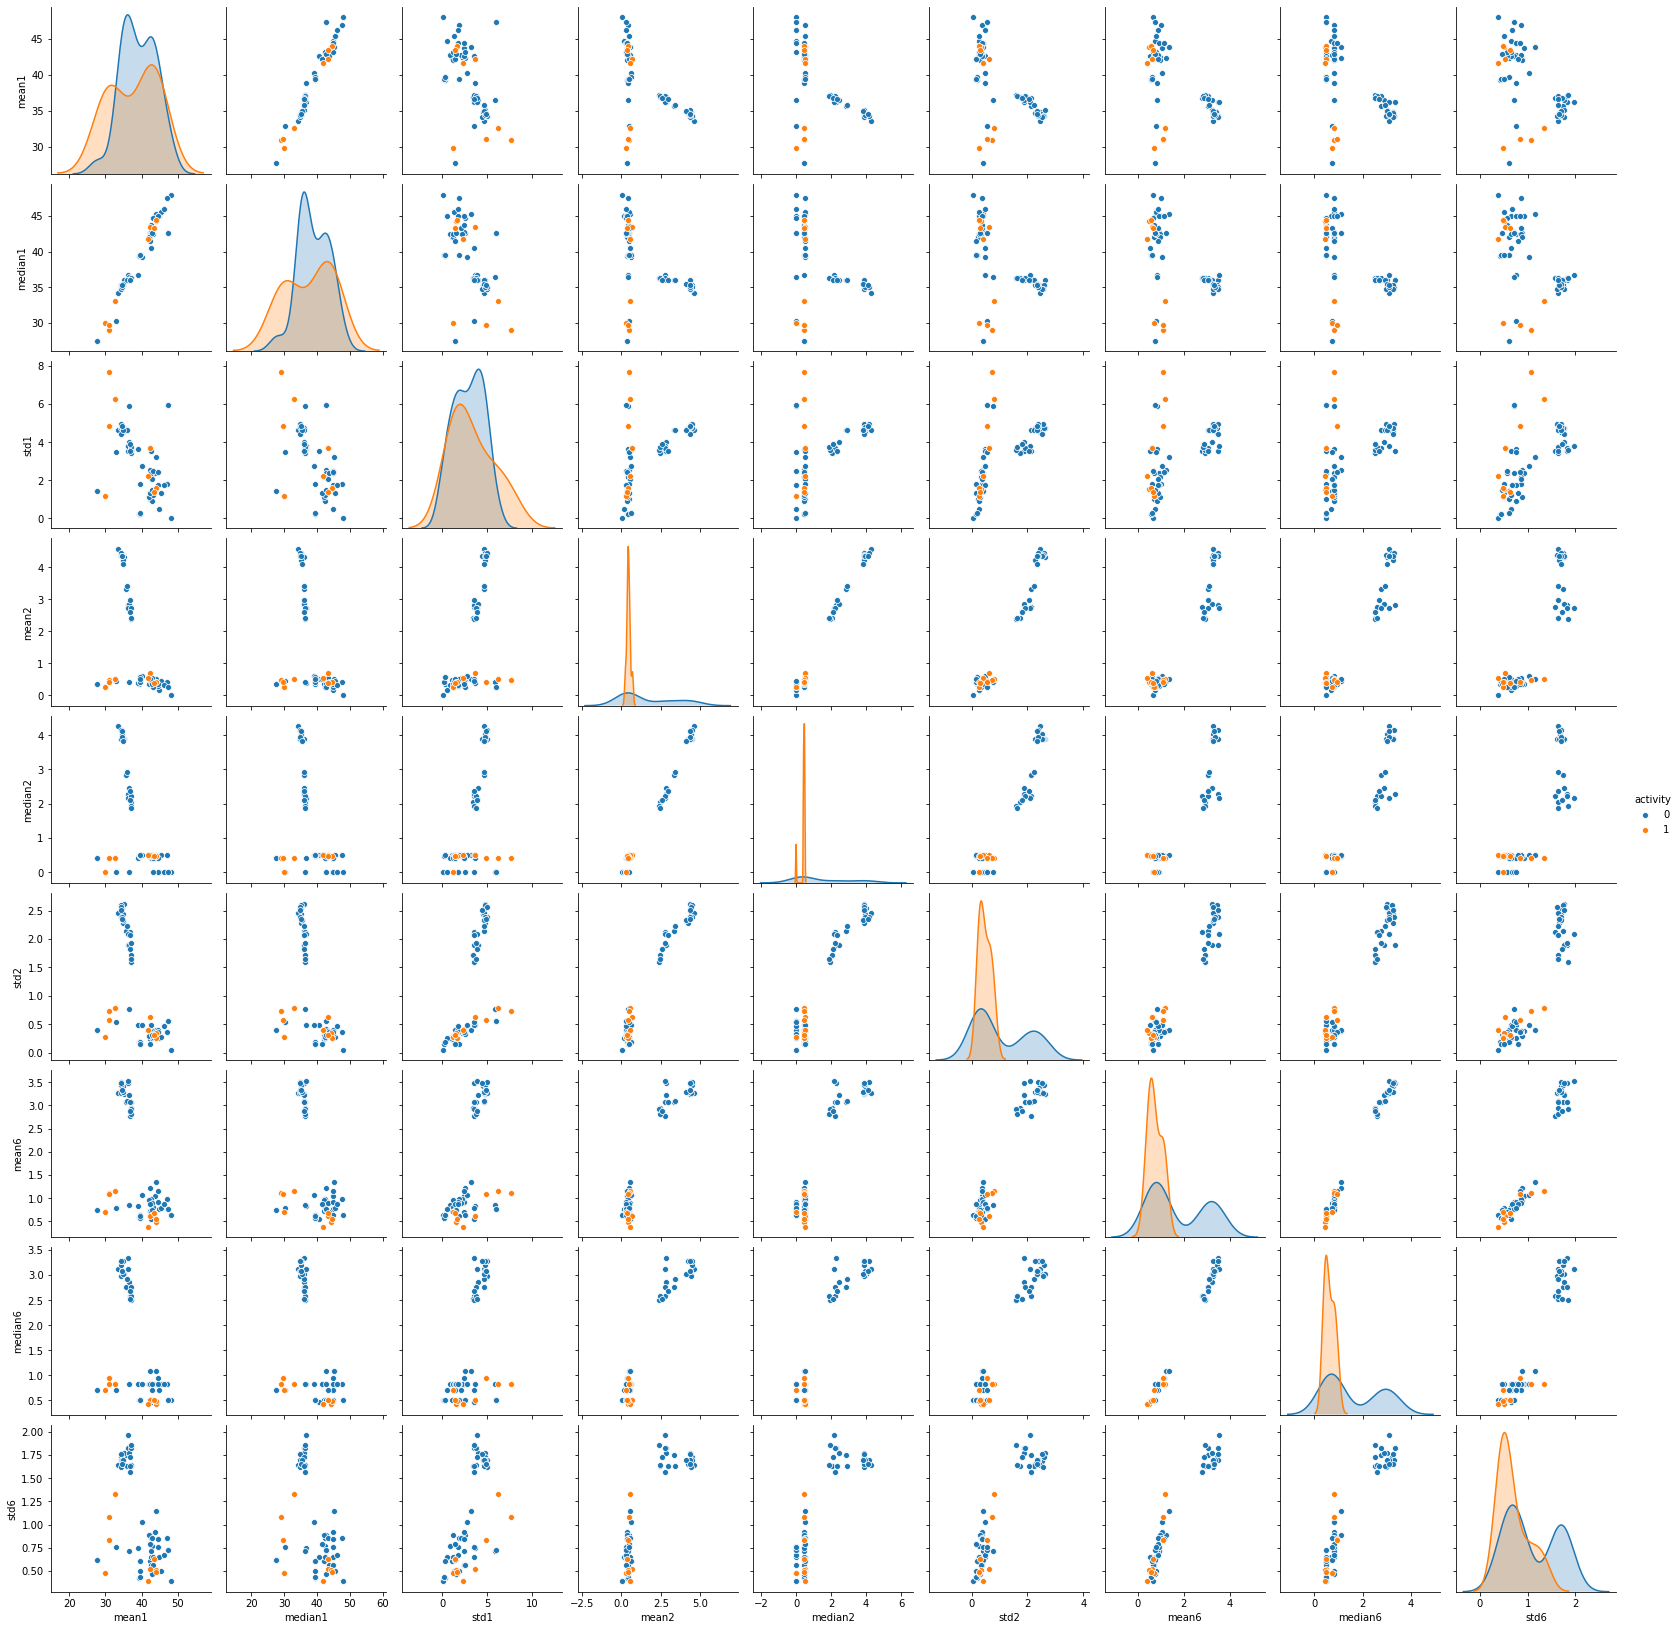

In [11]:
#Plotting scatter plots of the features extracted from time series 1, 2, and 6 of each instance
sns.pairplot(data = data_plot, hue = 'activity', kind = 'scatter')

d) ii) Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable difference in the results with those of 1(d)i?

In [12]:
#Preparing the structure for the final dataframe to hold the time domain features for each time-series when training
#set is divided into two equal parts
data_train = pd.DataFrame(columns = ['activity', 'min1', 'max1', 'mean1', 'median1', 'std1','quara1', 'quarc1',
              'min2', 'max2', 'mean2', 'median2', 'std2','quara2', 'quarc2',
             'min3', 'max3', 'mean3', 'median3', 'std3','quara3', 'quarc3',
             'min4', 'max4', 'mean4', 'median4', 'std4','quara4', 'quarc4',
             'min5', 'max5', 'mean5', 'median5', 'std5','quara5', 'quarc5',
             'min6', 'max6', 'mean6', 'median6', 'std6','quara6', 'quarc6',
             'min7', 'max7', 'mean7', 'median7', 'std7','quara7', 'quarc7',
             'min8', 'max8', 'mean8', 'median8', 'std8','quara8', 'quarc8',
             'min9', 'max9', 'mean9', 'median9', 'std9','quara9', 'quarc9',
             'min10', 'max10', 'mean10', 'median10', 'std10','quara10', 'quarc10',
             'min11', 'max11', 'mean11', 'median11', 'std11','quara11', 'quarc11',
             'min12', 'max12', 'mean12', 'median12', 'std12','quara12', 'quarc12'])
data_train

,activity,min1,max1,mean1,median1,std1,quara1,quarc1,min2,max2,...,std11,quara11,quarc11,min12,max12,mean12,median12,std12,quara12,quarc12


In [13]:
#Calculating and time-domain features for the training data(when split in two equal parts)
for file in os.listdir(train_path):
    if '.csv' in file:
        df_new = pd.read_csv(train_path+file,error_bad_lines=False,skiprows = 4)
        df_new.columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
        df_train1 = df_new.loc[0:239, :]
        df_train2 = df_new.loc[240:479, :]  
        df_train2 = df_train2.reset_index(0)
        df_train2 = df_train2.rename(columns = {'avg_rss12':'avg_rss12_new', 'var_rss12':'var_rss12_new',
                                                'avg_rss13':'avg_rss13_new', 'var_rss13':'var_rss13_new', 
                                                'avg_rss23':'avg_rss23_new', 'var_rss23':'var_rss23_new'})
        train = pd.concat([df_train1, df_train2], axis=1)
        train = train.drop('index', axis=1)
        row = []
        
        activity = file[10: -4]
        row.append(activity)

        for col in train[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23','avg_rss12_new',
                          'var_rss12_new','avg_rss13_new','var_rss13_new','avg_rss23_new','var_rss23_new']]:
            row.append(train[col].min())
            row.append(train[col].max())
            row.append(train[col].mean())
            row.append(train[col].median())
            row.append(train[col].std())
            row.append(np.quantile(train[col],0.25))
            row.append(np.quantile(train[col],0.75))

        row_df = pd.DataFrame([row],columns = data_train.columns)
        data_train = pd.concat([data_train,row_df],ignore_index = True) 
        
data_train

,activity,min1,max1,mean1,median1,std1,quara1,quarc1,min2,max2,...,std11,quara11,quarc11,min12,max12,mean12,median12,std12,quara12,quarc12
0,walking,24.33,44.00,34.920792,35.33,4.272282,32.2500,37.8125,0.0,14.82,...,3.163566,14.0000,18.0625,0.0,9.51,3.418667,3.350,1.598536,2.1700,4.4525
1,standing,36.67,45.00,42.241750,42.75,2.673133,40.2500,44.5000,0.0,2.12,...,4.308040,8.0000,13.7500,0.0,6.65,1.294458,1.090,0.995853,0.5000,1.6400
2,bending1,33.75,47.75,43.278875,45.00,3.473355,42.0000,45.2500,0.0,3.00,...,3.760118,28.7500,33.7500,0.0,2.18,0.586083,0.470,0.491873,0.0000,0.8700
3,bending1,36.50,46.50,44.057167,44.50,1.556971,43.2500,45.0000,0.0,1.50,...,2.298693,33.0000,36.2500,0.0,1.50,0.388333,0.000,0.478528,0.0000,0.7100
4,lying,39.00,40.00,39.313125,39.25,0.243587,39.0000,39.5000,0.0,0.50,...,1.106675,16.5000,18.0000,0.0,2.05,0.495500,0.470,0.381263,0.0000,0.8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,bending2,25.00,47.50,34.110625,30.50,5.097232,30.0000,39.3725,0.0,6.38,...,3.684946,8.3300,13.7500,0.0,4.92,1.199958,1.000,0.838177,0.7100,1.4100
65,walking,19.50,43.33,34.033875,35.00,4.758757,30.9375,37.5000,0.0,12.47,...,2.660153,13.6700,17.2500,0.0,8.64,3.432208,3.255,1.691050,2.1600,4.5125
66,lying,39.00,56.25,42.996417,42.25,3.278433,42.0000,42.5000,0.0,4.33,...,2.622766,14.6700,19.0000,0.0,3.56,0.643292,0.500,0.453367,0.4300,0.8300
67,sitting,27.00,37.50,30.470458,30.00,1.347559,30.0000,30.0000,0.0,1.79,...,4.036879,15.6275,21.0000,0.0,4.92,0.764000,0.730,0.691814,0.4300,1.0000


In [14]:
#For bending activities, value = 1 and for other activities, value = 0
data_train_plot = data_train[['activity', 'mean1', 'median1', 'std1', 'mean2', 'median2', 'std2', 
                  'mean12','median12', 'std12']]
data_train_plot = data_train_plot.replace(to_replace = ["bending1", "bending2"], value = 1) 
data_train_plot = data_train_plot.replace(to_replace = ["lying", "walking", "sitting", "cycling", "standing"], value = 0) 
data_train_plot

,activity,mean1,median1,std1,mean2,median2,std2,mean12,median12,std12
0,0,34.920792,35.33,4.272282,4.177958,3.865,2.341763,3.418667,3.350,1.598536
1,0,42.241750,42.75,2.673133,0.514417,0.500,0.369875,1.294458,1.090,0.995853
2,1,43.278875,45.00,3.473355,0.673292,0.485,0.634285,0.586083,0.470,0.491873
3,1,44.057167,44.50,1.556971,0.381042,0.470,0.329540,0.388333,0.000,0.478528
4,0,39.313125,39.25,0.243587,0.332000,0.430,0.212731,0.495500,0.470,0.381263
...,...,...,...,...,...,...,...,...,...,...
64,1,34.110625,30.50,5.097232,0.528500,0.470,0.712906,1.199958,1.000,0.838177
65,0,34.033875,35.00,4.758757,4.574625,4.470,2.391804,3.432208,3.255,1.691050
66,0,42.996417,42.25,3.278433,0.363583,0.430,0.405363,0.643292,0.500,0.453367
67,0,30.470458,30.00,1.347559,0.117750,0.000,0.287259,0.764000,0.730,0.691814


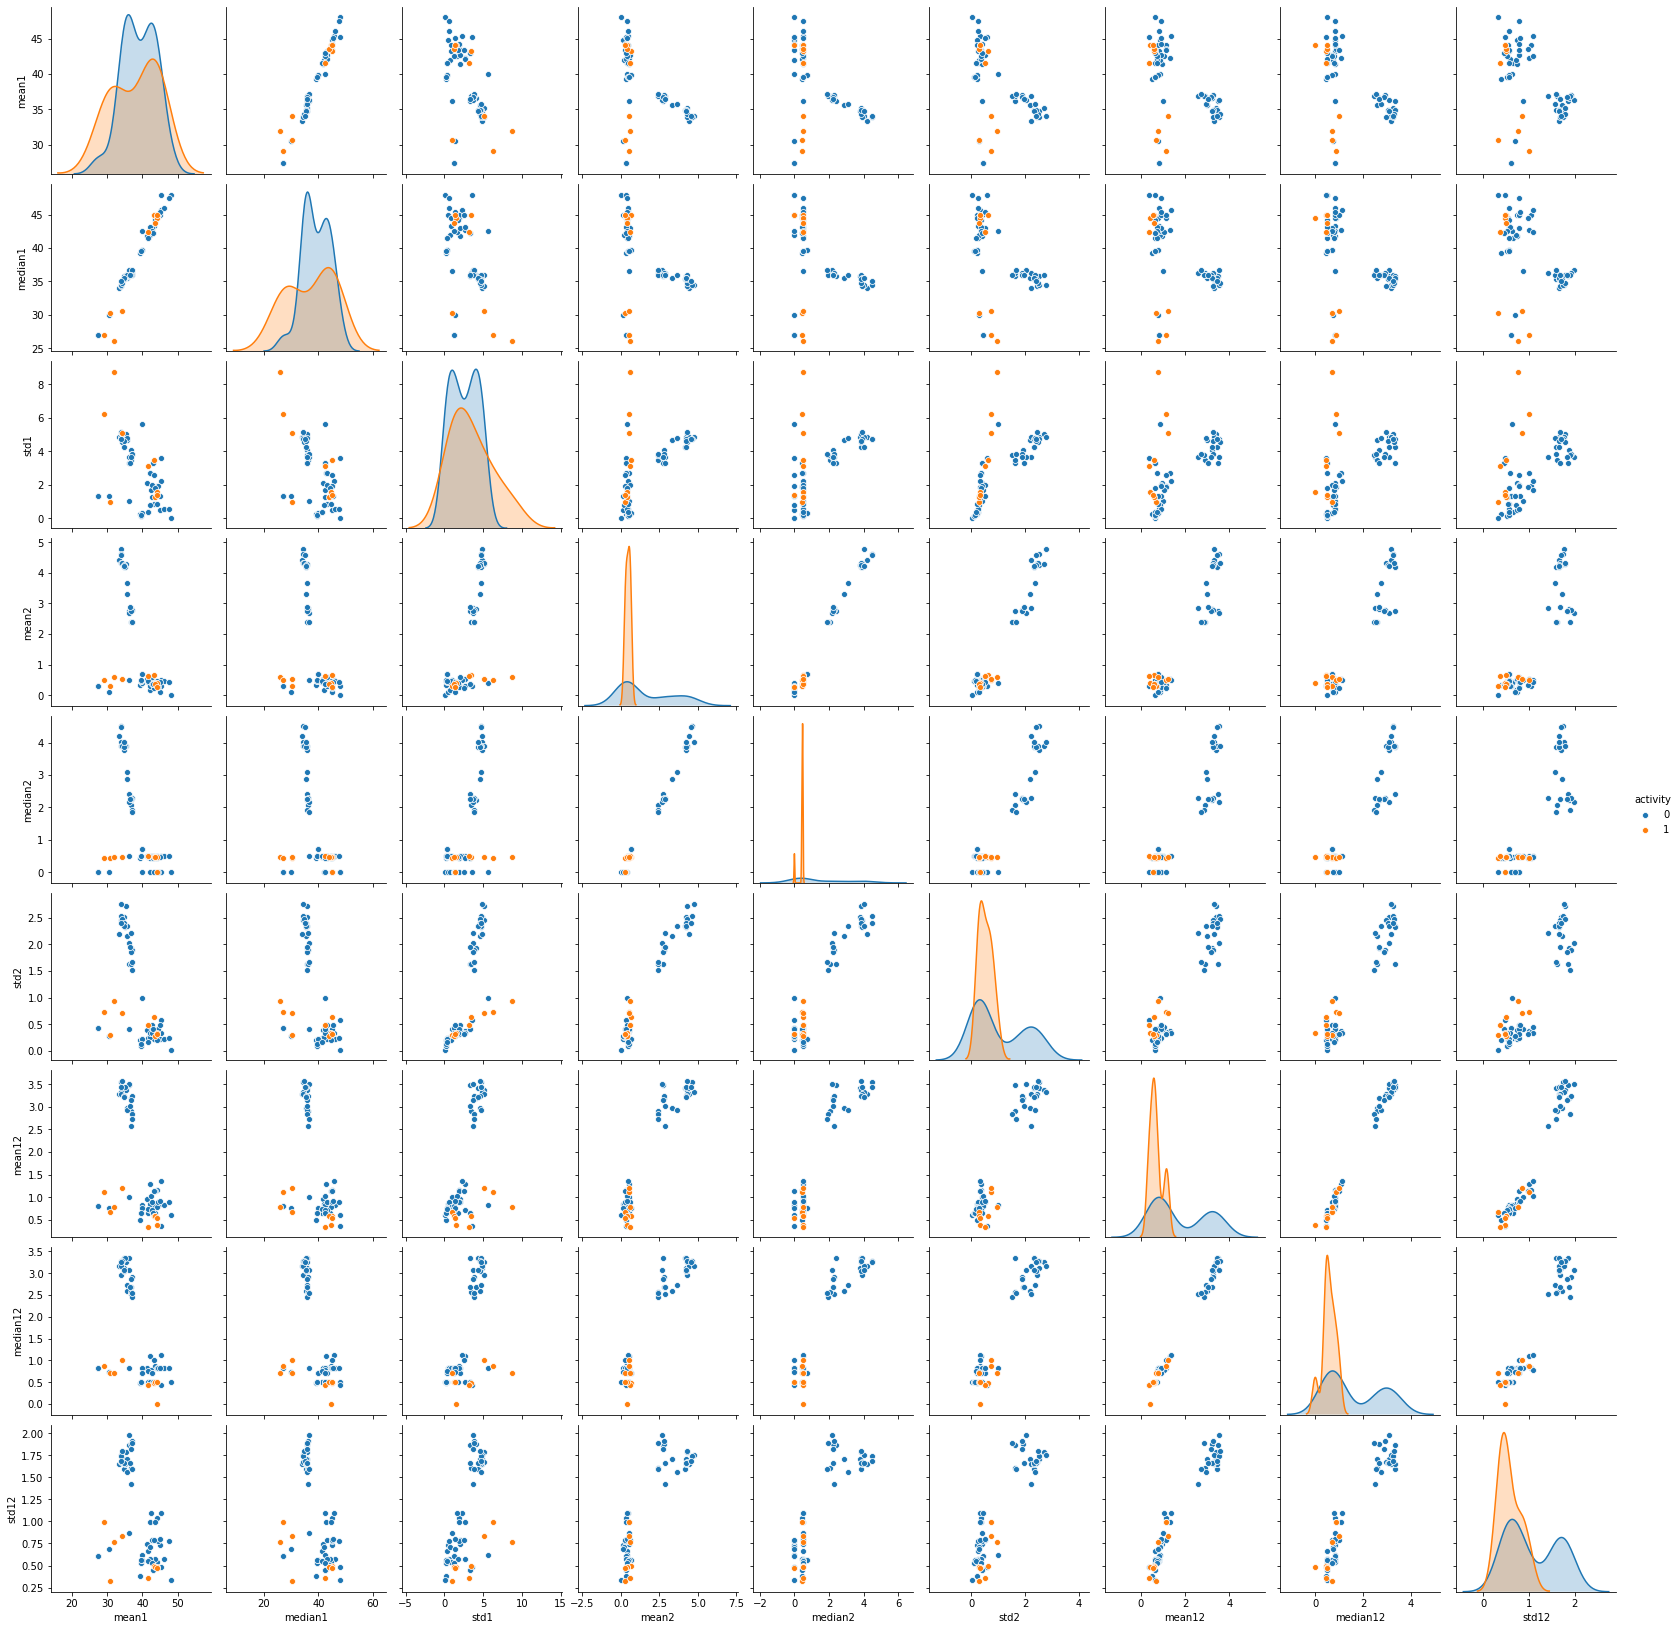

In [15]:
#Plotting scatter plots of the features extracted from time series 1, 2, and 6 of each instance when training data
#is split into two equal parts
sns.pairplot(data = data_train_plot, hue = 'activity', kind = 'scatter')

There is no significant difference between these two figures.

d) iii) Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series
of approximately equal length and use logistic regression5 to solve the binary
classification problem, using time-domain features. Remember that breaking
each of the time series does not change the number of instances. It only
changes the number of features for each instance. Calculate the p-values for
your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.Alternatively, you can use backward selection using sklearn.feature selection
or glm in R. Use 5-fold cross-validation to determine the best value of the pair
(l, p), where p is the number of features used in recursive feature elimination.
Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way. Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.
In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic regression.

In [16]:
#Calculating and time-domain features for the training data(when we break each time series in your training set into 
#l ∈ {1, 2, . . . , 20} time series of approximately equal length)
columns=['mean', 'median', 'std']
col_final = {}
for l in range(1,21):
    col_final[l] = ['activity']
for l in range(1, 21):
    for j in range(1,7):
        for x in range(l, 21):
            col_final[x].extend([col + str(l) + '_' + str(j) for col in columns])

final_dict = {}
for file in os.listdir(train_path):
    if '.csv' in file:
        df_lr = pd.read_csv(train_path+file,error_bad_lines=False,skiprows = 4)
#         print(file)
        arr = df_lr.values.tolist()
        for l in range(1, 21):
            arr_split= np.array_split(arr, l)
            row_per_file= [1 if file[10: -4] in ("bending1", "bending2") else 0]
            for element in arr_split:
                df_split = pd.DataFrame(element)
                row_per_col = []
                for col in range(1, 7) :
                    row_per_col.extend([df_split[col].mean(),df_split[col].median(), df_split[col].std()])
                row_per_file.extend(row_per_col)
            if l in final_dict:
                final_dict[l].append(row_per_file)
            else:
                final_dict[l]= [row_per_file]

In [17]:
pd.DataFrame(final_dict[17], columns=col_final[17])

,activity,mean1_1,median1_1,std1_1,mean1_2,median1_2,std1_2,mean1_3,median1_3,std1_3,...,std17_3,mean17_4,median17_4,std17_4,mean17_5,median17_5,std17_5,mean17_6,median17_6,std17_6
0,0,34.890690,35.33,4.631156,4.467931,4.50,2.068414,15.797241,14.75,4.015416,...,2.656246,2.861071,2.415,1.498187,14.812500,15.290,2.797345,3.930714,4.095,1.385809
1,0,38.543448,38.00,2.128399,0.850690,0.94,0.298651,17.397586,17.00,2.557500,...,1.980113,0.309286,0.430,0.292409,14.437500,14.875,1.718621,0.655000,0.500,0.422931
2,1,44.071724,45.00,3.239819,0.707931,0.50,0.688935,24.611379,24.00,2.483547,...,4.563940,1.002500,0.825,1.073042,29.592500,30.000,3.027458,0.435000,0.430,0.474970
3,1,43.770000,44.75,1.581983,0.320690,0.43,0.340629,22.350690,23.67,2.518484,...,2.577497,0.412857,0.430,0.354796,36.032500,36.000,0.235759,0.190357,0.000,0.325673
4,0,39.370690,39.33,0.248121,0.369655,0.47,0.193916,2.805517,2.50,1.363940,...,2.549147,1.116786,0.825,0.989778,15.761786,16.000,1.173832,0.830000,0.850,0.525406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,39.235862,39.00,2.085348,0.517931,0.47,0.422944,17.603448,18.00,3.470155,...,1.594289,0.364643,0.430,0.346501,6.492857,5.500,3.781492,1.050357,1.000,0.747844
65,0,34.339655,34.50,4.369629,4.051034,4.24,2.019520,15.413103,15.75,2.960050,...,2.598633,3.679286,3.460,1.750426,15.163214,15.290,2.849756,3.762500,3.655,1.524328
66,0,39.566552,39.50,0.506672,0.482414,0.47,0.173815,6.727241,5.33,3.617967,...,1.813797,0.602143,0.430,0.898007,14.374286,14.000,2.459654,0.926429,0.885,0.631150
67,0,30.097586,30.00,0.144263,0.152069,0.00,0.213765,20.919655,21.00,0.742142,...,3.339387,0.923214,0.830,0.589325,15.574643,15.750,2.228869,0.730714,0.825,0.330252


In [18]:
#Calculate the (l,p) pairs for the logistic regression parameters in each model corresponding to each value of l in [1,20]

for l in range(1,21,1):
    df_final = pd.DataFrame(final_dict[l], columns=col_final[l])
    y  = df_final['activity']
    x = df_final.drop(columns = ['activity'])
    model = LogisticRegression(max_iter = 2000)
    cv = StratifiedKFold(n_splits = 5)
    selector = RFECV(estimator=model, step=1, cv=cv,scoring='accuracy').fit(x,y)
    optimal_value = max(selector.grid_scores_)
    print('Value of l, p and maximum grid score is: ' + str(l) + ', ' + str(selector.n_features_) + ', ' + str(optimal_value) )

Value of l, p and maximum grid score is: 1, 2, 0.9274725274725275
Value of l, p and maximum grid score is: 2, 2, 0.9274725274725275
Value of l, p and maximum grid score is: 3, 1, 0.9714285714285715
Value of l, p and maximum grid score is: 4, 1, 0.9406593406593406
Value of l, p and maximum grid score is: 5, 1, 0.9406593406593406
Value of l, p and maximum grid score is: 6, 1, 0.9406593406593406
Value of l, p and maximum grid score is: 7, 1, 0.956043956043956
Value of l, p and maximum grid score is: 8, 1, 0.956043956043956
Value of l, p and maximum grid score is: 9, 1, 0.956043956043956
Value of l, p and maximum grid score is: 10, 3, 0.9571428571428571
Value of l, p and maximum grid score is: 11, 1, 0.9714285714285715
Value of l, p and maximum grid score is: 12, 8, 0.9571428571428571
Value of l, p and maximum grid score is: 13, 6, 0.9714285714285715
Value of l, p and maximum grid score is: 14, 15, 0.9571428571428573
Value of l, p and maximum grid score is: 15, 1, 0.956043956043956
Value o

d) iv) Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [19]:
#Refit a logistic regression model using your pruned set of features(l=17, p=11, max_score=0.9857142857142858)
df_final = pd.DataFrame(final_dict[17], columns=col_final[17])
y  = df_final['activity']
x = df_final.drop(columns = ['activity'])
model = LogisticRegression(max_iter = 2000)
cv = StratifiedKFold(n_splits = 5)
selector = RFECV(estimator=model, step=1, cv=cv,scoring='accuracy').fit(x,y)
pred_y = selector.predict(x)

#Calculating features which are selected
print(selector.support_)

#Calculating Confusion Matrix
print(pd.DataFrame(confusion_matrix(y, pred_y), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive']))

#Calculating ROC AUC score
print('\n ROC AUC Score is: ' + str(roc_auc_score(y, pred_y)) + '\n')

#Number of features
print(selector.n_features_)

[False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False Fa

In [20]:
#Calculating summary for the model(Beta coefficients and their respective p-values)
x_log = df_final.loc[:, ['std1_4', 'std2_4', 'mean2_5', 'std3_4', 'mean3_5','std5_4', 'mean5_5', 'std6_2', 'mean6_3', 'std9_6', 'mean16_5']]
logit = sm.Logit(y, x_log)
print(logit.fit(method = 'lbfgs').summary())
warnings.filterwarnings('ignore')

                           Logit Regression Results                           
Dep. Variable:               activity   No. Observations:                   69
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                           10
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                  0.7698
Time:                        23:23:26   Log-Likelihood:                -6.1497
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 1.068e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
std1_4        -3.2612      6.940     -0.470      0.638     -16.863      10.340
std2_4         0.8595      3.138      0.274      0.784      -5.291       7.010
mean2_5        0.2937      0.437      0.672      0.5

Area under the Receiver Operating Characteristic curve: 1.0


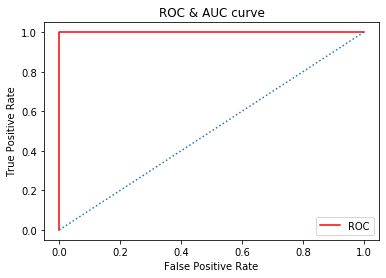

In [21]:
#Plotting ROC AUC Curve for training data
fpr, tpr, thresholds = roc_curve(y, pred_y)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.title('ROC & AUC curve')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y, pred_y))  

d) v) Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [22]:
#Calculating time-domain features for the testing data(when we break each time series in your testing set into 
#l ∈ {1, 2, . . . , 20} time series of approximately equal length)
columns=['mean', 'median', 'std']
col_final_test = {}
for l in range(1,21):
    col_final_test[l] = ['activity']
for l in range(1, 21):
    for j in range(1,7):
        for x in range(l, 21):
            col_final_test[x].extend([col + str(l) + '_' + str(j) for col in columns])


final_dict_test = {}
for file in os.listdir(test_path):
    if '.csv' in file:
        df_lr = pd.read_csv(test_path+file,error_bad_lines=False,skiprows = 4)
        arr_test = df_lr.values.tolist()
        for l in range(1, 21):
            arr_split= np.array_split(arr_test, l)
            row_per_file= [1 if file[9: -4] in ("bending1", "bending2") else 0]
            for element in arr_split:
                df_split = pd.DataFrame(element)
                row_per_col = []
                for col in range(1, 7) :
                    row_per_col.extend([df_split[col].mean(),df_split[col].median(), df_split[col].std()])
                row_per_file.extend(row_per_col)
            if l in final_dict_test:
                final_dict_test[l].append(row_per_file)
            else:
                final_dict_test[l]= [row_per_file]

In [23]:
pd.DataFrame(final_dict_test[17], columns=col_final_test[17])

,activity,mean1_1,median1_1,std1_1,mean1_2,median1_2,std1_2,mean1_3,median1_3,std1_3,...,std17_3,mean17_4,median17_4,std17_4,mean17_5,median17_5,std17_5,mean17_6,median17_6,std17_6
0,0,28.948276,29.00,0.122826,0.076552,0.00,0.171095,7.721724,7.75,0.780746,...,2.639294,0.873214,0.880,0.625490,10.053929,10.250,1.457932,0.915000,0.830,0.413356
1,0,33.105862,33.50,4.351962,5.259310,5.45,2.175089,16.471379,16.00,2.557592,...,2.839111,3.524286,3.015,1.957200,16.077143,15.790,2.949507,3.292143,3.085,1.947095
2,0,45.459655,45.33,0.481979,0.314138,0.43,0.243039,14.065862,13.75,4.175299,...,2.049260,1.140357,0.940,0.717261,20.500357,21.000,1.192363,0.257143,0.000,0.317570
3,0,37.871034,36.67,2.977413,2.182759,1.50,2.461940,16.744138,17.50,4.603165,...,4.041442,2.839286,2.490,2.166297,15.547857,16.375,3.423402,4.126071,3.835,1.871637
4,1,39.824828,39.50,0.557876,0.490345,0.50,0.132597,21.126552,23.00,3.266248,...,0.525225,0.462857,0.470,0.271728,30.443214,30.125,0.988920,0.253571,0.000,0.305217
5,1,19.996897,21.00,3.176239,1.334483,0.87,1.264291,23.087931,23.80,1.362784,...,1.082717,0.318571,0.430,0.333397,20.437143,20.585,1.052534,0.561071,0.500,0.281798
6,0,46.440000,46.50,0.186854,0.513448,0.50,0.145314,12.614828,12.00,1.965429,...,0.514141,0.399643,0.430,0.298508,15.728929,15.500,0.808370,0.615714,0.500,0.269944
7,0,47.577586,48.00,2.547378,0.563103,0.43,1.057632,22.516207,23.25,1.311407,...,4.740219,1.376786,1.275,1.218849,16.139286,18.250,4.341944,1.382143,0.830,1.807686
8,0,36.511379,34.75,4.034384,2.440345,2.49,1.557728,16.185517,17.33,3.624525,...,3.107225,2.729643,2.450,1.780800,19.812500,20.585,2.725711,2.760714,2.520,1.654791
9,1,43.463103,43.50,0.486578,0.516897,0.50,0.108467,18.255862,19.00,5.205641,...,5.729485,1.489643,1.455,1.171449,31.958214,32.000,1.036822,0.316071,0.430,0.348737


In [24]:
#Refit a logistic regression model using your pruned set of features(l=17)
df_final_test = pd.DataFrame(final_dict_test[17], columns=col_final_test[17])
y_test  = df_final_test['activity']
x_test = df_final_test.drop(columns = ['activity'])
model = LogisticRegression(max_iter = 2000)
cv = StratifiedKFold(n_splits = 5)
selector = RFECV(estimator=model, step=1, cv=cv,scoring='accuracy').fit(x_test,y_test)
y_pred = selector.predict(x_test)

#Number of features to be selected
print('the number of features are: ' + str(selector.n_features_))

#Calculating Confusion Matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive']))

#Calculating ROC AUC score
print('ROC AUC Score is: ' + str(roc_auc_score(y_test, y_pred)))

#Calculating features which are selected
print(selector.support_)
# print(selector.score(x, y))

df_final = pd.DataFrame(final_dict[17], columns=col_final[17])
x_log_train = df_final.loc[:, ['mean17_5', 'std12_3', 'median12_1', 'std12_1', 'mean8_5', 'mean7_5', 'median6_5']]

#Calculating summary for the model(Beta coefficients and their respective p-values)
logit = sm.Logit(y, x_log_train)
print(logit.fit(method = 'lbfgs').summary())
warnings.filterwarnings('ignore')

the number of features are: 7
                 Predicted Negative  Predicted Positive
Actual Negative                  15                   0
Actual Positive                   0                   4
ROC AUC Score is: 1.0
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
  True False False False False False False False F

Area under the Receiver Operating Characteristic curve: 1.0


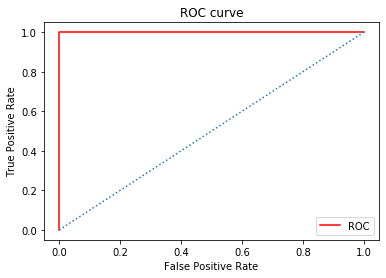

In [25]:
#Plotting ROC AUC Curve for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.title('ROC & AUC curve')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred)) 

The accuracy on the test set is same as the score we get when we use train dataset.

d) vi) Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?<br>
Sol) Yes.

d) vii) From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

-----------"Confusion Matrix"-------------
Predicted   0   1  All
True                  
0          15   0   15
1           0  60   60
All        15  60   75

 Area under the Receiver Operating Characteristic curve: 1.0


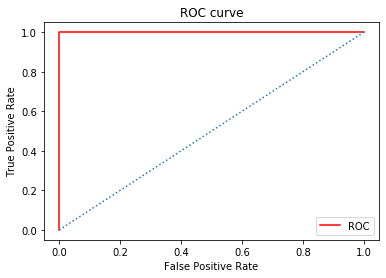

In [26]:
#build a logistic regression model based on case-control sampling and adjust its parameters
df_final_case = pd.DataFrame(final_dict_test[17], columns=col_final_test[17])
selected_Features = ['activity', 'std1_4', 'std2_4', 'mean2_5', 'std3_4', 'mean3_5','std5_4', 'mean5_5', 'std6_2', 'mean6_3', 'std9_6', 'mean16_5']
bending_DF = df_final_case[selected_Features][df_final_case.activity == 1]
otherType_DF = df_final_case[selected_Features][df_final_case.activity == 0]

bs_Bending_DF = resample(bending_DF, replace=True, n_samples=60, random_state=2333)
BendingDF_all = pd.concat([otherType_DF, bs_Bending_DF])

y_case  = BendingDF_all['activity']
x_case = BendingDF_all.drop(columns='activity', axis=1)

model_log = LogisticRegression()
model_log.fit(x_case, y_case)
y_predict = model_log.predict(x_case)

#Calculating Confusion Matrix
conf_matrix = pd.crosstab(y_case, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)
print("-----------\"Confusion Matrix\"-------------")
print(conf_matrix)

#Plotting ROC AUC Curve for testing data
fpr1, tpr1, thresholds1 = roc_curve(y_case, y_predict)
plt.plot(fpr1, tpr1, color='red', label='ROC')
plt.plot([0, 1], [0, 1], linestyle='dotted')
plt.title('ROC & AUC curve')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('\n Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_case, y_predict)) 

(e) Binary Classification Using L1-penalized logistic regression
i) Repeat 1(d)iii using L1-penalized logistic regression,8 i.e. instead of using p-
values for variable selection, use L1 regularization. Note that in this problem,
you have to cross-validate for both l, the number of time series into which you
break each of your instances, and λ, the weight of L1 penalty in your logistic
regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [27]:
#Binary Classification Using L1-penalized logistic regression
lambda_track={}
for l in range(1,21):
    #labels_tr=[]
    final_df = pd.DataFrame(final_dict[l], columns=col_final[l])
    labels = final_df['activity']
    train_data = final_df.drop(columns='activity')

    logit = LogisticRegressionCV(cv = 5, penalty = 'l1', solver = 'liblinear', max_iter = 1000, Cs=np.logspace(-3, 3, 7))
    logit.fit(train_data, labels)
    lambda_track[l] = [logit.C_[0], logit.score(train_data, labels)]

lambda_track

{1: [1.0, 0.9855072463768116],
 2: [0.1, 0.9710144927536232],
 3: [0.1, 0.9710144927536232],
 4: [0.1, 0.9710144927536232],
 5: [0.1, 0.9710144927536232],
 6: [0.1, 0.9710144927536232],
 7: [10.0, 1.0],
 8: [0.1, 0.9710144927536232],
 9: [1.0, 1.0],
 10: [0.1, 0.9855072463768116],
 11: [1.0, 1.0],
 12: [0.1, 0.9855072463768116],
 13: [0.1, 0.9855072463768116],
 14: [0.1, 0.9855072463768116],
 15: [0.1, 0.9855072463768116],
 16: [0.1, 0.9855072463768116],
 17: [0.1, 0.9855072463768116],
 18: [0.1, 0.9855072463768116],
 19: [0.1, 0.9855072463768116],
 20: [0.1, 0.9855072463768116]}

In [28]:
#Finding best l and lambda value
list_score = [lambda_track[x][1] for x in range(1, 21)]
best_l = np.argmax(list_score)+1
best_lambda = lambda_track[best_l][0]
(best_l, best_lambda)

(7, 10.0)

In [29]:
#Fitting the model again with the value of best lambda
final_df_x = pd.DataFrame(final_dict[best_l], columns=col_final[best_l])
labels_x = final_df_x['activity']
train_data_x = final_df_x.drop(columns='activity')

logit = LogisticRegressionCV(penalty = 'l1', solver = 'liblinear', max_iter = 1000, Cs=[best_lambda])
logit.fit(train_data_x, labels_x)

LogisticRegressionCV(Cs=[10.0], class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [30]:
#Finding the score for the logistic regression model
final_df_test_part_e= pd.DataFrame(final_dict_test[best_l], columns=col_final_test[best_l])
labels_test_part_e = final_df_test_part_e['activity']
test_data_part_e = final_df_test_part_e.drop(columns='activity')
logit.score(test_data_part_e, labels_test_part_e)

1.0

e) ii) Compare the L1-penalized with variable selection using p-values. Which one
performs better? Which one is easier to implement?
<br>Sol) Lasso Regression performs better and it is also easier to implement.

(f) Multi-class Classification (The Realistic Case)<br>
i) Find the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your train-
10
cross-validation for λ automatically.
ing set.
Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem, if possible.

In [31]:
#Creating Multi-class dataset
class DATASET_LABEL(enum.Enum):
    BENDING1 = 0
    BENDING2 = 0
    CYCLING = 1
    LYING = 2
    SITTING = 3
    STANDING = 4
    WALKING = 5

In [32]:
def convert_label_2_num(label):
    return DATASET_LABEL[str.upper(label)].value

In [33]:
#For Train data
columns=['mean', 'median', 'std']
col_final = {}
for l in range(1,21):
    col_final[l] = ['activity']
for l in range(1, 21):
    for j in range(1,7):
        for x in range(l, 21):
            col_final[x].extend([col + str(l) + '_' + str(j) for col in columns])

final_dict = {}
for file in os.listdir(train_path):
    if '.csv' in file:
        df_lr = pd.read_csv(train_path+file,error_bad_lines=False,skiprows = 4)
        arr = df_lr.values.tolist()
        for l in range(1, 21):
            arr_split= np.array_split(arr, l)
            row_per_file= [convert_label_2_num(file[10: -4])]
            for element in arr_split:
                df_split = pd.DataFrame(element)
                row_per_col = []
                for col in range(1, 7) :
                    row_per_col.extend([df_split[col].mean(),df_split[col].median(), df_split[col].std()])
                row_per_file.extend(row_per_col)
            if l in final_dict:
                final_dict[l].append(row_per_file)
            else:
                final_dict[l]= [row_per_file]

In [34]:
#For test data
columns=['mean', 'median', 'std']
col_final_test = {}
for l in range(1,21):
    col_final_test[l] = ['activity']
for l in range(1, 21):
    for j in range(1,7):
        for x in range(l, 21):
            col_final_test[x].extend([col + str(l) + '_' + str(j) for col in columns])


final_dict_test = {}
for file in os.listdir(test_path):
    if '.csv' in file:
        df_lr = pd.read_csv(test_path+file,error_bad_lines=False,skiprows = 4)
        arr_test = df_lr.values.tolist()
        for l in range(1, 21):
            arr_split= np.array_split(arr_test, l)
            row_per_file= [convert_label_2_num(file[9: -4])]
            for element in arr_split:
                df_split = pd.DataFrame(element)
                row_per_col = []
                for col in range(1, 7) :
                    row_per_col.extend([df_split[col].mean(),df_split[col].median(), df_split[col].std()])
                row_per_file.extend(row_per_col)
            if l in final_dict_test:
                final_dict_test[l].append(row_per_file)
            else:
                final_dict_test[l]= [row_per_file]

In [35]:
#Calculating Test Error
warnings.filterwarnings('ignore')
logitCVTestErrorRateList = list()
for l in range(1,21):
    final_df = pd.DataFrame(final_dict[l], columns=col_final[l])
    labels_train = final_df['activity']
    train_data = final_df.drop(columns='activity')
    
    final_df_test = pd.DataFrame(final_dict_test[l], columns=col_final_test[l])
    labels_test = final_df_test['activity']
    test_data = final_df_test.drop(columns='activity')    
    
    logit_mod = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear").fit(train_data, labels_train)
    logitCVTestErrorRateList.append(1 - logit_mod.score(test_data, labels_test))

In [36]:
#Printing Test Error rate and the best l value
print("Test Error Rate : ", logitCVTestErrorRateList)
# # find the best l
bestL = logitCVTestErrorRateList.index(min(logitCVTestErrorRateList)) + 1
print("Best l : ", bestL)

Test Error Rate :  [0.1578947368421053, 0.1578947368421053, 0.052631578947368474, 0.10526315789473684, 0.21052631578947367, 0.1578947368421053, 0.052631578947368474, 0.052631578947368474, 0.10526315789473684, 0.10526315789473684, 0.1578947368421053, 0.052631578947368474, 0.10526315789473684, 0.1578947368421053, 0.26315789473684215, 0.10526315789473684, 0.1578947368421053, 0.052631578947368474, 0.26315789473684215, 0.052631578947368474]
Best l :  3


In [37]:
trainStaticResult = pd.DataFrame(final_dict[bestL], columns=col_final[bestL])
labels_train_best_l = trainStaticResult['activity']
train_data_best_l = trainStaticResult.drop(columns='activity')

testStaticResult = pd.DataFrame(final_dict_test[bestL], columns=col_final_test[bestL])
labels_test_best_l = testStaticResult['activity']
test_data_best_l = testStaticResult.drop(columns='activity')

In [38]:
bin_y_train = label_binarize(labels_train_best_l, classes=[0, 1, 2, 3, 4, 5])
bin_y_test = label_binarize(labels_test_best_l, classes=[0, 1, 2, 3, 4, 5])

In [39]:
classifier = OneVsRestClassifier(
    LogisticRegressionCV(cv=StratifiedKFold(5), penalty="l1", solver="liblinear")
).fit(train_data_best_l, bin_y_train)

Predicted  0  1  2  3  5  All
True                         
0          4  0  0  0  0    4
1          0  3  0  0  0    3
2          0  0  3  0  0    3
3          0  0  0  3  0    3
4          3  0  0  0  0    3
5          0  0  0  0  3    3
All        7  3  3  3  3   19


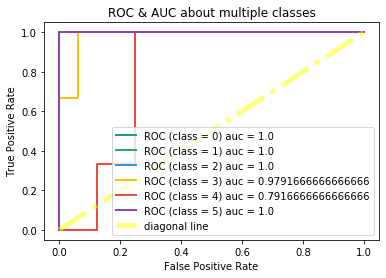

In [40]:
#Confusion Matrix
y_score = classifier.fit(train_data_best_l, bin_y_train).decision_function(test_data_best_l)
y_predict = classifier.predict(test_data_best_l)
conf_mat = pd.crosstab(bin_y_test.argmax(axis=1), y_predict.argmax(axis=1), rownames=['True'],
                       colnames=['Predicted'], margins=True)
print(conf_mat)

#Compute ROC curve and AUC for each class
falsePositiveRate = dict()
truePositiveRate = dict()
areas = dict()
for i in range(bin_y_train.shape[1]):
    falsePositiveRate[i], truePositiveRate[i], _ = roc_curve(bin_y_test[:, i], y_score[:, i])
    areas[i] = auc(falsePositiveRate[i], truePositiveRate[i])

#Plotting the ROC and AUC Curve
colors = ['#16a085', '#27ae60', '#3498db', '#f1c40f', '#e74c3c', '#8e44ad']
for index in range(bin_y_train.shape[1]):
    plt.plot(falsePositiveRate[index], truePositiveRate[index], color=colors[index],
             label='ROC (class = {}) auc = {}'.format(index, str(areas[index])), 
             linewidth=2, linestyle='-')

plt.plot([0, 1], [0, 1], linestyle='-.', linewidth=5, alpha=0.5, 
         color='yellow', label='diagonal line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC about multiple classes')
plt.legend()
plt.show()

f) ii) Repeat 1(f)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

In [41]:
#Naive Bayes’ classifier- Gaussian prior
warnings.filterwarnings("ignore", category=DeprecationWarning)
gaussianTestErrorRateList = list()
for l in range(1,21):
    final_df = pd.DataFrame(final_dict[l], columns=col_final[l])
    labels_train = final_df['activity']
    train_data = final_df.drop(columns='activity')
    
    final_df_test = pd.DataFrame(final_dict_test[l], columns=col_final_test[l])
    labels_test = final_df_test['activity']
    test_data = final_df_test.drop(columns='activity')    
    
    gaussianClassifier = GaussianNB()
    gaussianTestErrorRateList.append(1 - np.mean(
        cross_val_score(gaussianClassifier, train_data, labels_train, cv=5)))

#Test Error rate    
print("Test Error Rate : ", gaussianTestErrorRateList)

#find the best l
bestL = gaussianTestErrorRateList.index(min(gaussianTestErrorRateList)) + 1
print("Best l : ", bestL)

trainStaticResult = pd.DataFrame(final_dict[bestL], columns=col_final[bestL])
labels_train_best_l = trainStaticResult['activity']
train_data_best_l = trainStaticResult.drop(columns='activity')

testStaticResult = pd.DataFrame(final_dict_test[bestL], columns=col_final_test[bestL])
labels_test_best_l = testStaticResult['activity']
test_data_best_l = testStaticResult.drop(columns='activity')

params = {}
classifier = GridSearchCV(GaussianNB(), 
                          cv=StratifiedKFold(5), 
                          param_grid=params).fit(train_data_best_l, labels_train_best_l)
y_predict = classifier.predict(test_data_best_l)

crosstab = pd.crosstab(labels_test_best_l, y_predict, rownames=['True'],
                       colnames=['Predicted'], margins=True)
print(crosstab)

Test Error Rate :  [0.143956043956044, 0.14395604395604378, 0.17252747252747247, 0.15824175824175823, 0.143956043956044, 0.15824175824175823, 0.1879120879120879, 0.1879120879120879, 0.15934065934065944, 0.17252747252747258, 0.1879120879120879, 0.17472527472527466, 0.23186813186813182, 0.15824175824175823, 0.15934065934065933, 0.21648351648351638, 0.23076923076923073, 0.20219780219780215, 0.17362637362637368, 0.1879120879120879]
Best l :  2
Predicted  0  1  2  3  4  5  All
True                            
0          4  0  0  0  0  0    4
1          0  3  0  0  0  0    3
2          0  0  3  0  0  0    3
3          0  0  0  2  1  0    3
4          0  0  0  2  1  0    3
5          0  0  0  0  0  3    3
All        4  3  3  4  2  3   19


In [42]:
#Naive Bayes’ classifier- Multinomial priors
multiTestErrorRateList = list()

for l in range(1,21):
    final_df = pd.DataFrame(final_dict[l], columns=col_final[l])
    labels_train = final_df['activity']
    train_data = final_df.drop(columns='activity')
    
    final_df_test = pd.DataFrame(final_dict_test[l], columns=col_final_test[l])
    labels_test = final_df_test['activity']
    test_data = final_df_test.drop(columns='activity')    
    
    multinomialClassifier = MultinomialNB()
    multiTestErrorRateList.append(1 - np.mean(
        cross_val_score(multinomialClassifier, train_data, labels_train, cv=5)))

#Test Error rate    
print("Test Error Rate : ", multiTestErrorRateList)

#find the best l
bestL = multiTestErrorRateList.index(min(multiTestErrorRateList)) + 1
print("Best l : ", bestL)

trainStaticResult = pd.DataFrame(final_dict[bestL], columns=col_final[bestL])
labels_train_best_l = trainStaticResult['activity']
train_data_best_l = trainStaticResult.drop(columns='activity')

testStaticResult = pd.DataFrame(final_dict_test[bestL], columns=col_final_test[bestL])
labels_test_best_l = testStaticResult['activity']
test_data_best_l = testStaticResult.drop(columns='activity')

params = {}
classifier = GridSearchCV(MultinomialNB(), 
                          cv=StratifiedKFold(5), 
                          param_grid=params).fit(train_data_best_l, labels_train_best_l)

y_predict = classifier.predict(test_data_best_l)

#Confusion Matrix
crosstab = pd.crosstab(labels_test_best_l, y_predict, rownames=['True'],
                       colnames=['Predicted'], margins=True)
print(crosstab)

Test Error Rate :  [0.14725274725274728, 0.1461538461538462, 0.16043956043956042, 0.1461538461538462, 0.13186813186813173, 0.189010989010989, 0.16043956043956042, 0.17472527472527477, 0.16043956043956042, 0.1461538461538462, 0.1461538461538462, 0.1461538461538462, 0.16043956043956042, 0.1461538461538462, 0.1461538461538462, 0.1461538461538462, 0.16043956043956042, 0.1175824175824175, 0.20439560439560434, 0.1901098901098901]
Best l :  18
Predicted  0  1  2  3  4  5  All
True                            
0          4  0  0  0  0  0    4
1          0  3  0  0  0  0    3
2          0  0  3  0  0  0    3
3          0  0  0  2  1  0    3
4          0  0  0  0  3  0    3
5          0  0  0  0  0  3    3
All        4  3  3  2  4  3   19
